## Diabetes Prediction using Artificial Neural Network(ANN)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


## DATA CLEANING

In [13]:
print('Number of duplicate rows:', df.duplicated().sum())

Number of duplicate rows: 0


In [15]:
# Check for missing values in each column
print('Missing values in each column:')
display(df.isnull().sum())

Missing values in each column:


Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64

In [17]:
df = df.dropna()

In [19]:
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].fillna(df["Alcohol_Consumption"].mode()[0])

In [21]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6680 non-null   int64  
 1   Age                            6680 non-null   int64  
 2   Sex                            6680 non-null   object 
 3   Ethnicity                      6680 non-null   object 
 4   BMI                            6680 non-null   float64
 5   Waist_Circumference            6680 non-null   float64
 6   Fasting_Blood_Glucose          6680 non-null   float64
 7   HbA1c                          6680 non-null   float64
 8   Blood_Pressure_Systolic        6680 non-null   int64  
 9   Blood_Pressure_Diastolic       6680 non-null   int64  
 10  Cholesterol_Total              6680 non-null   float64
 11  Cholesterol_HDL                6680 non-null   float64
 12  Cholesterol_LDL                6680 non-null   float6

## Feature Engineering

Target column Diabetes created based on Fasting_Blood_Glucose.


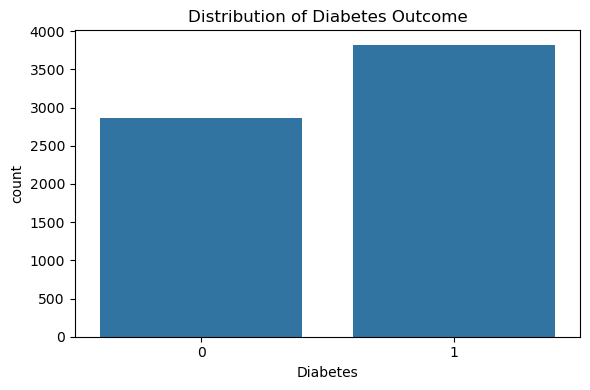

In [37]:
# Create new target column 'Diabetes'
if 'Fasting_Blood_Glucose' in df.columns:
    df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)
    print('Target column Diabetes created based on Fasting_Blood_Glucose.')
else:
    print('Fasting_Blood_Glucose column not found.')

# Examine the distribution of the new target
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.tight_layout()
plt.show()

In [39]:
# Select predictor columns (excluding 'Diabetes' and non-informative string columns)
feature_cols = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
                'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL',
                'GGT', 'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes',
                'Previous_Gestational_Diabetes']



In [41]:
feature_cols = [col for col in feature_cols if col in df.columns]

## SPLITTING THE DATA INTO TRAIN AND TEST SPLIT


In [47]:
from sklearn.model_selection import train_test_split
X = df[feature_cols]
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training and test sets created with proportions:')
print('Train:', X_train.shape, 'Test:', X_test.shape)

Training and test sets created with proportions:
Train: (5344, 15) Test: (1336, 15)


## TRANING THE DATA 
## USING ARTIFICIAL NEURAL NETWORK(ANN)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy * 100:.2f}%")



Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6829 - loss: 3.9818 - val_accuracy: 0.8548 - val_loss: 0.4711
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8495 - loss: 0.6973 - val_accuracy: 0.9304 - val_loss: 0.1988
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8966 - loss: 0.4119 - val_accuracy: 0.7972 - val_loss: 1.2137
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8966 - loss: 0.3937 - val_accuracy: 0.9341 - val_loss: 0.1962
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9195 - loss: 0.2769 - val_accuracy: 0.9132 - val_loss: 0.3228
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9017 - loss: 0.5815 - val_accuracy: 0.9409 - val_loss: 0.1781
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8820 - loss: 0.7142 - val_accuracy: 0.9461 - val_loss: 0.1658
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9341 - loss: 0.2779 - val_accuracy:

## MODEL PREDICTION ON TEST SET

In [63]:

# Predicting on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary (0 or 1) for classification
y_pred_binary = (y_pred > 0.5).astype(int)

# Print the predicted values
print("Predicted values on the test set:")
print(y_pred_binary)



42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
Predicted values on the test set:
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


              precision    recall  f1-score   support

           0       0.78      1.00      0.87       590
           1       1.00      0.77      0.87       746

    accuracy                           0.87      1336
   macro avg       0.89      0.88      0.87      1336
weighted avg       0.90      0.87      0.87      1336



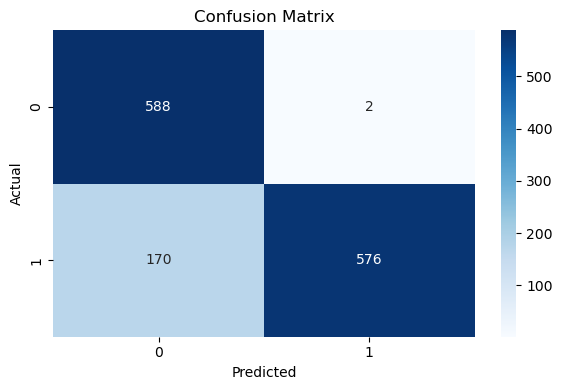

In [65]:

from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
